In [ ]:
import numpy as np

The dichotomy search
Amount of iterations $\approx log_2(\frac{b - a}{\mathcal{E}})$<br>
Amount of function calculations = 2 * amount of iterations (2 calculations on each iteration)$<br>
In this realization we are getting result more accurate than we need cause while calculating x1 and x2 we add and subtract accuracy divided by 3 to average between ends of interval

In [ ]:
def dichotomy(f, a : float, b : float, accuracy : float):
    iter_count = 0
    call_count = 0
    while b - a > accuracy:
        x1 = (a + b) / 2 - accuracy / 3
        x2 = (a + b) / 2 + accuracy / 3

        if f(x1) > f(x2): a = x1
        else: b = x2

        iter_count += 1
        call_count += 2

    return (a + b) / 2, iter_count, call_count

The golden-section search
Amount of iterations = $\log_{\frac{-1 + \sqrt{5}}{2}}({\frac{\mathcal{E}}{b - a}})$ <br>
Amount of function calculations = 1 * amount of iterations + 1 (1 calculation on each iteration and 1 more at the beginning)

In [ ]:
def golden_section(f, a : float, b : float, accuracy : float):
    k = (3 - np.sqrt(5)) / 2
    x1 = a + k * (b - a)
    x2 = b - k * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    iter_count = 0
    call_count = 2

    while b - a > accuracy:
        if f1 > f2:
            a = x1
            x1 = x2
            x2 = b - k * (b - a)
            f1 = f2
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            x1 = a + k * (b - a)
            f2 = f1
            f1 = f(x1)

        iter_count += 1
        call_count += 1

    return (a + b) / 2, iter_count, call_count  #returning mid of the interval

Parabolas search
Amount of iterations = ja hz nigde ne mogu naiti ety zalupu no dolzhno byt' ochen' malo
Amount of function calculations = 1 * amount of iterations + 2 (1 calculation on each iteration and 2 more at the beginning)

In [ ]:
def parabolas(f, a, b, tol=1e-9, maxiter=30):
    x1, x2, x3 = a, (a + b) / 2, b
    f1, f2, f3 = f(x1), f(x2), f(x3)
    iters = 0
    while abs(x3 - x1) >= tol and iters < maxiter:
        iters += 1

        u = x2 - ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) / (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)))
        fu = f(u)

        if u > a and u < b:
            if fu < f2:
                if u < x2:
                    x3, f3 = x2, f2
                else:
                    x1, f1 = x2, f2
                x2, f2 = u, fu
            else:
                if u < x2:
                    x1, f1 = u, fu
                else:
                    x3, f3 = u, fu
        else:
            if u < x2:
                x3, f3 = x2, f2
            else:
                x1, f1 = x2, f2
            x2, f2 = (x1 + x3) / 2, f((x1 + x3) / 2)

    return x2, iters, iters + 3

Метод Фибоначчи

In [ ]:
def fibonacci_number(n):
  return (1 / np.sqrt(5)) * ((( (1 + np.sqrt(5)) / 2) ** n) - ((((1 - np.sqrt(5)) / 2) ** n)))

def fibonacci_search(f, a : float, b : float, n : int):
  x1 = a + fibonacci_number(n) / fibonacci_number(n + 2) * (b - a)
  x2 = a + fibonacci_number(n) / fibonacci_number(n + 1) * (b - a)

  f1, f2 = f(x1), f(x2)

  iter_count = 1
  call_count = 2
  while iter_count < n:

    iter_count += 1

    if f1 > f2:
      a = x1
      x1 = x2
      f1 = f2

      x2 = a + fibonacci_number(n - iter_count + 1) / fibonacci_number(n - iter_count + 2) * (b - a)
      f2 = f(x2)
    else:
      b = x2
      x2 = x1
      f2 = f1

      x1 = a + fibonacci_number(n - iter_count) / fibonacci_number(n - iter_count + 2) * (b - a)
      f1 = f(x1)

    call_count += 1

  return (x1 + x2) / 2, iter_count, call_count


Метод Брента

In [ ]:
def brent_top(x, v, w, f):
  fx, fv, fw = f(x), f(v), f(w)
  return x - ((x - v) ** 2 * (fx - fw) - (x - w) ** 2 * (fx - fv)) / ((x - v) * (fv - fw) - (x - w) * (fx - fv)) / 2

def brent_search(f, a : float, b : float, accuracy : float):
  k = (3 - np.sqrt(5)) / 2
  w = v = x = (a + b) / 2
  deviation = accuracy / 10

  fw = fv = fx = f(x)
  d = e = b - a
  u = 0

  iter_count = 0
  call_count = 1

  while b - a > accuracy:
    g = e
    e = d
    parabola = False
    if abs(fx - fw) > 1e-9 and abs(fx - fv) > 1e-9 and abs(fv - fw) > 1e-9:
      u = brent_top(x, v, w, f)

      if u >= a + accuracy and u <= b - accuracy and abs(u - x) < g / 2:
        d = abs(u - x)
        parabola = True
    if not parabola:
      if x < (b + a) / 2:
        u = x + k * (b - x)
        d = b - x
      else:
        u = x - k*(x - a)
        d = x - a
    if abs(u - x) < deviation:
      u = x + np.sign(u - x) * accuracy

    fu = f(u)
    call_count += 1

    if fu <= fx:
      if u >= x: a = x
      else: b = x
      v = w
      w = x
      x = u
      fv = fw
      fw = fx
      fx = fu
    else:
      if u >= x:
        b = u
      else:
        a = u

      if fu <= fw or abs(w - x) < 1e-9:
        v = w
        w = u
        fv = fw
        fw = fu
      elif fu <= fv or abs(v - x) < 1e-9 or abs(v - w) < 1e-9:
        v = u
        fv = fu

    iter_count += 1
  return x, iter_count, call_count

Finding min for our function by different searches

In [ ]:
f = lambda x: np.exp(np.sin(x)) * x * x
#f = lambda x: np.sin(x) * (x**3)
a, b = -5.1, 2.498 # on this interval our function is unimodal
real_min = 0
d_result, d_iter, d_call = dichotomy(f, a, b, 1e-9)
gs_result, gs_iter, gs_call = golden_section(f, a, b, 1e-9)
p_result, p_iter, p_call = parabolas(f, a, b, tol=1e-9)
f_result, f_iter, f_call = fibonacci_search(f, a, b, 50)
b_result, b_iter, b_call = brent_search(f, a, b, 1e-9)
print('Results calculated by:')
print(f'Dichotomy search: min {d_result}, iterations amount {d_iter}, calls count {d_call}')
print(f'Golden section search: min {gs_result}, iterations amount {gs_iter}, calls count {gs_call}')
print(f'Parabolas search: min {p_result}, iterations amount {p_iter}, calls count {p_call}')
print(f'Fibonacci search: min {f_result}, iterations amount {f_iter}, calls count {f_call}')
print(f'Brent search: min {b_result}, iterations amount {b_iter}, calls count {b_call}')

Results calculated by:
Dichotomy search: min 5.857863483335719e-11, iterations amount 35, calls count 70
Golden section search: min -7.481899047214426e-11, iterations amount 48, calls count 50
Parabolas search: min -1.7727753892257035e-21, iterations amount 30, calls count 33
Fibonacci search: min -2.8809202662519464e-10, iterations amount 50, calls count 51
Brent search: min 9.493292875340984e-11, iterations amount 55, calls count 56


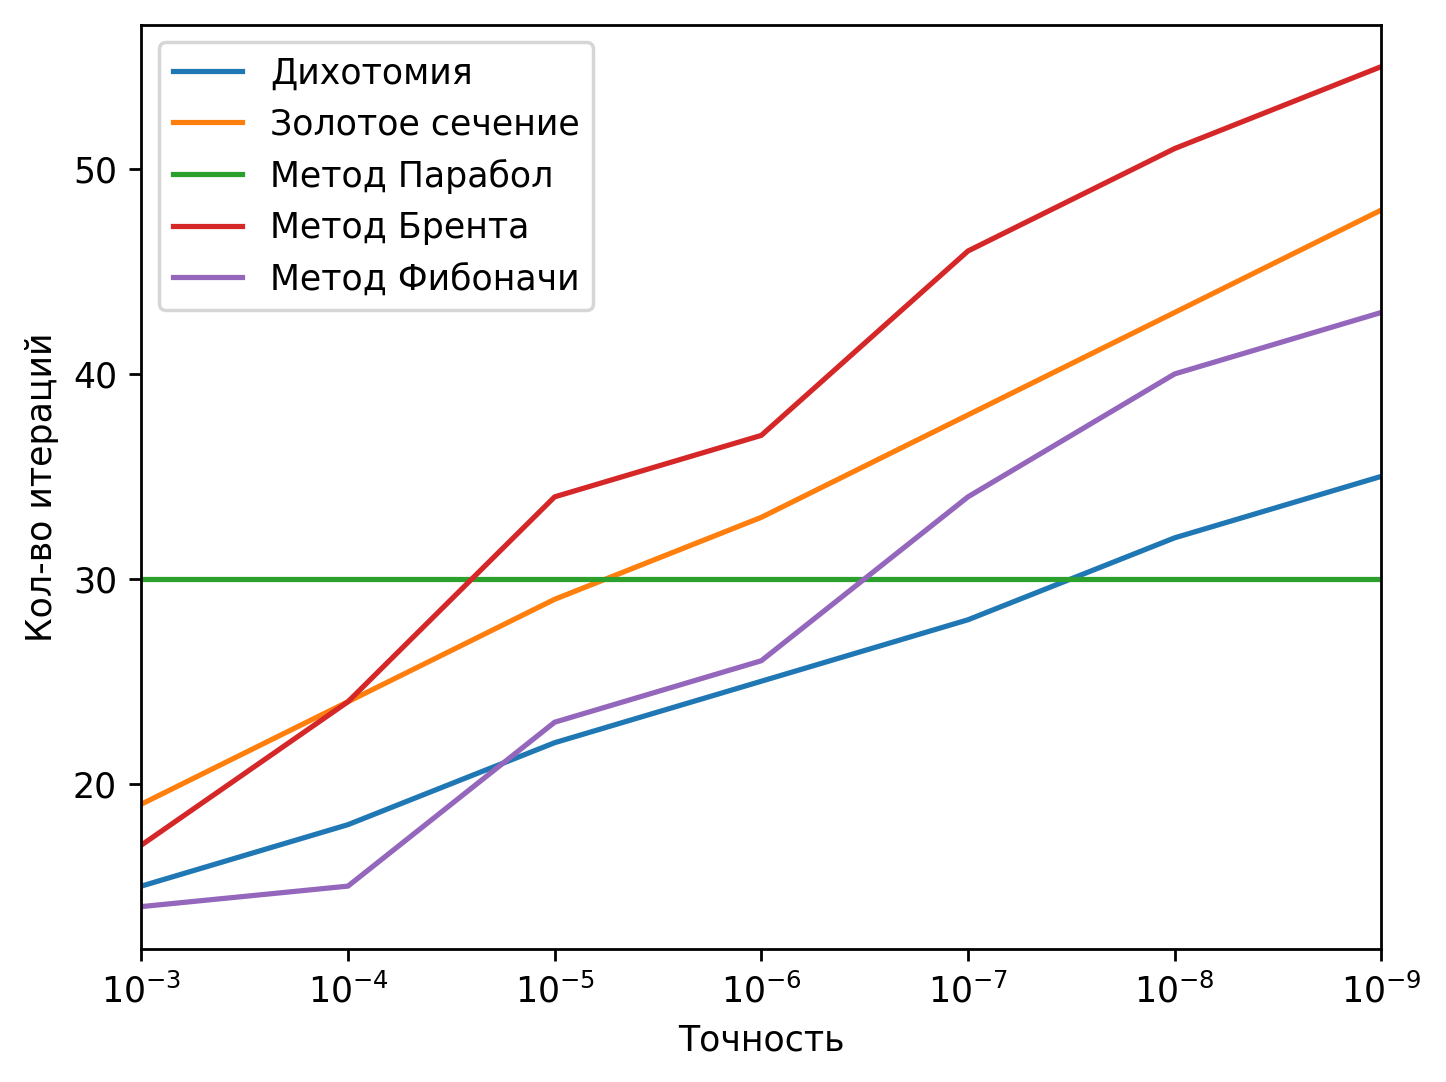

In [ ]:
import matplotlib.pyplot as plt

# a, b = 0, 1

plt.figure(dpi=250)

plt.xlabel("Точность")
plt.ylabel("Кол-во итераций")

def generate_precisions(f, method, accuracies):
    global a, b
    res = []
    for accuracy in accuracies:
        res.append(method(f,a,b,accuracy)[1])
    return res

def fibonacci_precisions(f, accuracies):
    global a, b, fibonacci_search, real_min
    res = []
    for accuracy in accuracies:
        n = 1
        while True:
            if n == 50:
                break
            nres = fibonacci_search(f, a, b, n)[0]
            if abs(nres - real_min) <= accuracy:
                res.append(n)
                break
            n += 1
    return res

accuracies = [10**(-i) for i in range(3, 9+1)]
it_dichotomy = generate_precisions(f, dichotomy, accuracies)
it_golden_section = generate_precisions(f, golden_section, accuracies)
it_parabolas = generate_precisions(f, parabolas, accuracies)
it_brent_search = generate_precisions(f, brent_search, accuracies)
it_fibonacci_search = fibonacci_precisions(f, accuracies)

x = [i for i in range(len(accuracies))]
xlabels = [f"$10^{{-{i}}}$" for i in range(3, 9+1)]
plt.xticks(x, xlabels)
plt.xlim(x[0], x[-1])

plt.plot(x, it_dichotomy, label="Дихотомия")
plt.plot(x, it_golden_section, label="Золотое сечение")
plt.plot(x, it_parabolas, label="Метод Парабол")
plt.plot(x, it_brent_search, label="Метод Брента")
plt.plot(x, it_fibonacci_search, label="Метод Фибоначи")

plt.legend()

plt.show()

Исследование методов на многомодальных функциях

In [ ]:
f = lambda x: x ** 4 - 12 * x ** 3 + 47 * x ** 2 - 72 * x + 36
a, b = 3, 10 # on this interval our function is unimodal
real_min = 5.057
d_result, d_iter, d_call = dichotomy(f, a, b, 1e-9)
gs_result, gs_iter, gs_call = golden_section(f, a, b, 1e-9)
p_result, p_iter, p_call = parabolas(f, a, b, 1e-9)
f_result, f_iter, f_call = fibonacci_search(f, a, b, 30)
b_result, b_iter, b_call = brent_search(f, a, b, 1e-9)
print('Results calculated by:')
print(f'Dichotomy search: min {d_result}, iterations amount {d_iter}, calls count {d_call}')
print(f'Golden section search: min {gs_result}, iterations amount {gs_iter}, calls count {gs_call}')
print(f'Parabolas search: min {p_result}, iterations amount {p_iter}, calls count {p_call}')
print(f'Fibonacci search: min {f_result}, iterations amount {f_iter}, calls count {f_call}')
print(f'Brent search: min {b_result}, iterations amount {b_iter}, calls count {b_call}')

Results calculated by:
Dichotomy search: min 5.056549493812009, iterations amount 35, calls count 70
Golden section search: min 5.0565452634600625, iterations amount 48, calls count 50
Parabolas search: min 5.056545143067253, iterations amount 30, calls count 33
Fibonacci search: min 5.056541077598977, iterations amount 30, calls count 31
Brent search: min 5.05654523647624, iterations amount 62, calls count 63


In [ ]:
f = lambda x: x ** 4 - 6 * x ** 3 + 11 * x ** 2 - 6 * x + 1
a, b = 0, 10 # on this interval our function is unimodal
real_min = 2.618
d_result, d_iter, d_call = dichotomy(f, a, b, 1e-9)
gs_result, gs_iter, gs_call = golden_section(f, a, b, 1e-9)
p_result, p_iter, p_call = parabolas(f, a, b, 1e-9, 60)
f_result, f_iter, f_call = fibonacci_search(f, a, b, 30)
b_result, b_iter, b_call = brent_search(f, a, b, 1e-9)
print('Results calculated by:')
print(f'Dichotomy search: min {d_result}, iterations amount {d_iter}, calls count {d_call}')
print(f'Golden section search: min {gs_result}, iterations amount {gs_iter}, calls count {gs_call}')
print(f'Parabolas search: min {p_result}, iterations amount {p_iter}, calls count {p_call}')
print(f'Fibonacci search: min {f_result}, iterations amount {f_iter}, calls count {f_call}')
print(f'Brent search: min {b_result}, iterations amount {b_iter}, calls count {b_call}')

Results calculated by:
Dichotomy search: min 2.618034539641121, iterations amount 35, calls count 70
Golden section search: min 2.618033995861629, iterations amount 48, calls count 50
Parabolas search: min 2.618013713250517, iterations amount 60, calls count 63
Fibonacci search: min 2.618031760367016, iterations amount 30, calls count 31
Brent search: min 2.6180340005555967, iterations amount 67, calls count 68


In [ ]:
f = lambda x: x ** 4 - 6 * x ** 3 - 29 * x ** 2 + 294 * x-735
a, b = -10, 10 # on this interval our function is unimodal
real_min = 5.057
d_result, d_iter, d_call = dichotomy(f, a, b, 1e-9)
gs_result, gs_iter, gs_call = golden_section(f, a, b, 1e-9)
p_result, p_iter, p_call = parabolas(f, a, b, 1e-9)
f_result, f_iter, f_call = fibonacci_search(f, a, b, 30)
b_result, b_iter, b_call = brent_search(f, a, b, 1e-9)
print('Results calculated by:')
print(f'Dichotomy search: min {d_result}, iterations amount {d_iter}, calls count {d_call}')
print(f'Golden section search: min {gs_result}, iterations amount {gs_iter}, calls count {gs_call}')
print(f'Parabolas search: min {p_result}, iterations amount {p_iter}, calls count {p_call}')
print(f'Fibonacci search: min {f_result}, iterations amount {f_iter}, calls count {f_call}')
print(f'Brent search: min {b_result}, iterations amount {b_iter}, calls count {b_call}')

Results calculated by:
Dichotomy search: min -3.934230555911025, iterations amount 36, calls count 72
Golden section search: min -3.9342289363669787, iterations amount 50, calls count 52
Parabolas search: min -3.934072436222474, iterations amount 30, calls count 33
Fibonacci search: min -3.9342360256392244, iterations amount 30, calls count 31
Brent search: min -3.9342288546073148, iterations amount 83, calls count 84
